In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
df = pd.read_csv("D:/house_data.csv")


In [15]:
features = ['number of bedrooms', 'number of bathrooms', 'living area', 
            'lot area', 'number of floors', 'Area of the basement']
target = 'Price'
df = df[features + [target]].dropna()

In [17]:
X = df[features].values
y = df[target].values.reshape(-1, 1)

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
np.random.seed(42)
n_features = X_train.shape[1]
weights = np.random.randn(n_features, 1)
bias = 0.0

learning_rate = 0.01
epochs = 100
loss_history = []

In [27]:
for epoch in range(epochs):
    y_pred = np.dot(X_train, weights) + bias
    loss = np.mean((y_pred - y_train)**2)
    loss_history.append(loss)
    dW = (2 / len(X_train)) * np.dot(X_train.T, (y_pred - y_train))
    dB = (2 / len(X_train)) * np.sum(y_pred - y_train)
    weights -= learning_rate * dW
    bias -= learning_rate * dB

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 422813134562.0279
Epoch 10: Loss = 291233174228.0220
Epoch 20: Loss = 213636513682.4472
Epoch 30: Loss = 165127454175.3973
Epoch 40: Loss = 133679632328.5751
Epoch 50: Loss = 112835209603.6550
Epoch 60: Loss = 98818496706.4746
Epoch 70: Loss = 89290029517.4565
Epoch 80: Loss = 82748082664.0311
Epoch 90: Loss = 78209002543.7797


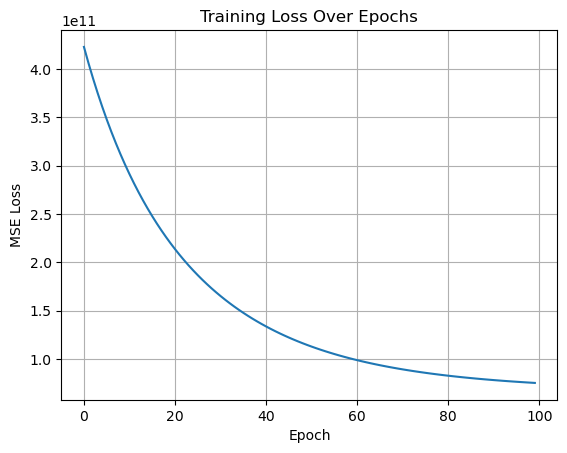

In [29]:
plt.plot(range(epochs), loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()

In [31]:
y_test_pred = np.dot(X_test, weights) + bias

comparison_df = pd.DataFrame({
    "Predicted": np.round(y_test_pred.flatten(), 2),
    "Actual": np.round(y_test.flatten(), 2)
})

print(comparison_df.head(10))

   Predicted   Actual
0  279230.18   235000
1  402182.87   552000
2  310197.44   615000
3  496712.52   555000
4  517111.41   649950
5  382027.54   257700
6  486309.15   980000
7  418637.23   535000
8  549459.18  1030000
9  506012.42   549950
